In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("SimTodActData.csv")
df = df.drop("Unnamed: 0", 1)
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})

In [3]:
df.head()

,subject,activity,raw acc data,x,y,z,magnitude,max,min,std,...,z fft max,x fft std,y fft std,z fft std,x fft mean,y fft mean,z fft mean,x fft median,y fft median,z fft median
0,gia,walking,"[[-9.8000000000000007, 0.29999999999999999, -1...","[-9.8000000000000007, -9.8000000000000007, -9....","[0.29999999999999999, 0.29999999999999999, 0.2...","[-1.5, -1.5, -1.5, -1.5, -1.3999999999999999, ...","[9.918669265581952, 9.918669265581952, 9.91866...",19.460987,5.989157,2.138958,...,1079.2,216.656616,32.517470,54.208134,37.885761,30.626037,26.741320,17.115459,18.706380,15.332066
1,gia,walking,"[[-10.199999999999999, -5.5999999999999996, -6...","[-10.199999999999999, -10.199999999999999, -9....","[-5.5999999999999996, -5.5999999999999996, 1.8...","[-6.9000000000000004, -6.9000000000000004, -0....","[13.528118864054973, 13.528118864054973, 10.09...",22.588935,6.953416,3.033713,...,1274.8,220.048435,45.184089,66.272867,49.840810,42.185402,31.584286,24.121850,27.862495,18.243679
2,gia,walking,"[[-11.1, 0.90000000000000002, -1.5], [-9.59999...","[-11.1, -9.5999999999999996, -9.59999999999999...","[0.90000000000000002, 0.20000000000000001, 0.2...","[-1.5, -1.3, -1.3, -1.3, -1.3, -1.2, -1.2, -1....","[11.236992480196825, 9.689685237405806, 9.6896...",21.328150,6.024118,2.440292,...,1247.6,216.315245,39.397003,64.940776,44.424934,35.081280,29.317837,19.893042,21.568396,15.816370
3,gia,walking,"[[-9.1999999999999993, 0.80000000000000004, -2...","[-9.1999999999999993, -8.8000000000000007, -8....","[0.80000000000000004, 0.59999999999999998, 0.5...","[-2.1000000000000001, -1.8999999999999999, -1....","[9.470480452437457, 9.022749026765624, 9.02274...",20.667608,6.041523,2.709005,...,1232.8,217.573703,47.634312,65.859887,44.130419,40.566147,30.912380,20.230861,24.249746,15.651961
4,gia,walking,"[[-8.0999999999999996, -4.2000000000000002, -4...","[-8.0999999999999996, -8.0999999999999996, -8....","[-4.2000000000000002, -4.2000000000000002, -4....","[-4.5999999999999996, -4.5999999999999996, -4....","[10.218121158021175, 10.218121158021175, 10.21...",18.157643,6.071244,2.444689,...,1234.6,217.111464,43.474904,63.720433,43.111043,36.085907,27.122803,19.465791,22.425787,13.486303


In [24]:
Y = df['activity']
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 
            'y mean','z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x std', 'y std', 'z std',
            'xy mean', 'yz mean', 'xz mean', 'x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
            'z noise max', 'x noise std', 'y noise std', 'z noise std' , 'x fft min', 'y fft min', 'z fft min', 
            'x fft max', 'y fft max', 'z fft max', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft std', 'y fft std', 'z fft std']
X = df[features]
groups = df.subject.unique()

In [25]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





In [26]:
def grid(X_train,y_train,X_test,y_test):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [#[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
    #                                            'min_samples_leaf': [1, 5, 10, 15, 20],#     v
    #                                            'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    # models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

    # models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    #models.append([svm.SVC(kernel='rbf', class_weight={1:10,9:1}), {#'kernel': ['rbf'], # class_weight="balanced"; tol
                              # 'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    #models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])





    models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               }, "Random Forest"])

    models_with_best_params = []

    # cross-validation strategy
    cv = 10 # for 10-folds cross-validation

    # Leave One Group Out
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)


    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = 5)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        print(model[2], ": ")
        print("Best score for ", model[2], ":", clf.best_score_)
        print()
        print("Best parameters for ", model[2], " found on development set:", best_params)
        print()
        print("Best estimator for ", model[2], " model:", best_estimator)
        print()
        print()

        print("Grid scores on development set:")
        print()
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean_score, scores.std() * 2, params))
        print()

    print(models_with_best_params)
    
    return best_params['n_estimators']

In [27]:
def run(pram, X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=pram)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: Random Forest')

    plt.show()
    
    return metrics.accuracy_score(expected,predicted)

9
gia
(63, 68)
(503, 68)


C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9365079365079365

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.889 (+/-0.198) for {'n_estimators': 10}
0.873 (+/-0.099) for {'n_estimators': 20}
0.905 (+/-0.121) for {'n_estimators': 30}
0.873 (+/-0.099) for {'n_estimators': 40}
0.937 (+/-0.106) for {'n_estimators': 50}
0.905 (+/-0.095) for {'n_estimators': 60}
0.921 (+/-0.143) for {'n_estimators': 70}
0.921 (+/-0.085) for {'n_estimators': 80}
0.921 (+/-0.141) for {'n_estimators': 90}
0.889 (+/

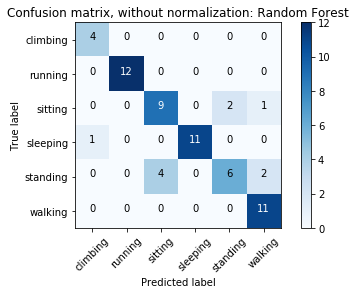

ilona
(62, 68)
(504, 68)


C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9838709677419355

Best parameters for  Random Forest  found on development set: {'n_estimators': 60}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.952 (+/-0.074) for {'n_estimators': 10}
0.968 (+/-0.100) for {'n_estimators': 20}
0.968 (+/-0.077) for {'n_estimators': 30}
0.952 (+/-0.108) for {'n_estimators': 40}
0.968 (+/-0.077) for {'n_estimators': 50}
0.984 (+/-0.050) for {'n_estimators': 60}
0.984 (+/-0.050) for {'n_estimators': 70}
0.968 (+/-0.077) for {'n_estimators': 80}
0.952 (+/-0.108) for {'n_estimators': 90}
0.984 (+/

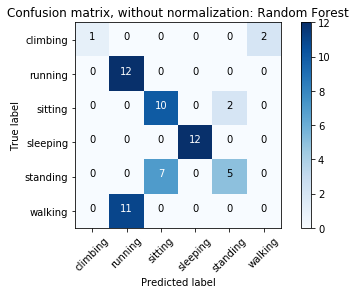

lili
(65, 68)
(501, 68)


C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9384615384615385

Best parameters for  Random Forest  found on development set: {'n_estimators': 30}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.923 (+/-0.138) for {'n_estimators': 10}
0.923 (+/-0.194) for {'n_estimators': 20}
0.938 (+/-0.147) for {'n_estimators': 30}
0.938 (+/-0.147) for {'n_estimators': 40}
0.923 (+/-0.194) for {'n_estimators': 50}
0.908 (+/-0.204) for {'n_estimators': 60}
0.923 (+/-0.194) for {'n_estimators': 70}
0.908 (+/-0.204) for {'n_estimators': 80}
0.923 (+/-0.194) for {'n_estimators': 90}
0.923 (+/

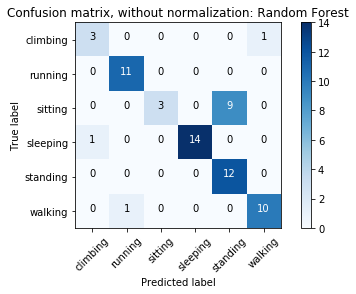

chris
(63, 68)
(503, 68)
Random Forest : 
Best score for  Random Forest : 0.9523809523809523

Best parameters for  Random Forest  found on development set: {'n_estimators': 90}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.937 (+/-0.149) for {'n_estimators': 10}
0.937 (+/-0.149) for {'n_estimators': 20}
0.937 (+/-0.149) for {'n_estimators': 30}
0.921 (+/-0.140) for {'n_estimators': 40}
0.937 (+/-0.149) for {'n_estimators': 50}
0.937 (+/-0.149) for {'n_estimators': 60}
0.921 (+/-0.140) for {'n_estimators': 70}
0.937 (+/-0.149) for {'n_estimators': 80}
0.952 (+/-0.108) for {'n_e

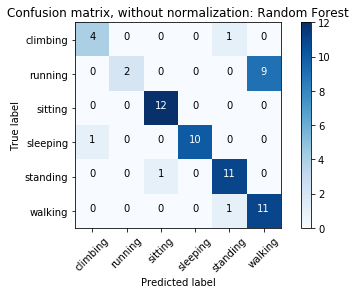

david
(61, 68)
(505, 68)


C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9344262295081968

Best parameters for  Random Forest  found on development set: {'n_estimators': 10}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.934 (+/-0.147) for {'n_estimators': 10}
0.934 (+/-0.147) for {'n_estimators': 20}
0.934 (+/-0.147) for {'n_estimators': 30}
0.934 (+/-0.147) for {'n_estimators': 40}
0.934 (+/-0.147) for {'n_estimators': 50}
0.934 (+/-0.147) for {'n_estimators': 60}
0.934 (+/-0.147) for {'n_estimators': 70}
0.934 (+/-0.147) for {'n_estimators': 80}
0.934 (+/-0.147) for {'n_estimators': 90}
0.934 (+/

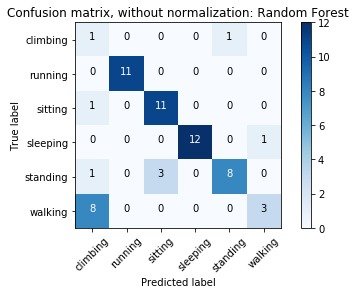

julia
(66, 68)
(500, 68)
Random Forest : 
Best score for  Random Forest : 0.9545454545454546

Best parameters for  Random Forest  found on development set: {'n_estimators': 10}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.955 (+/-0.108) for {'n_estimators': 10}
0.955 (+/-0.082) for {'n_estimators': 20}
0.924 (+/-0.142) for {'n_estimators': 30}
0.939 (+/-0.103) for {'n_estimators': 40}
0.939 (+/-0.103) for {'n_estimators': 50}
0.939 (+/-0.103) for {'n_estimators': 60}
0.955 (+/-0.082) for {'n_estimators': 70}
0.955 (+/-0.082) for {'n_estimators': 80}
0.939 (+/-0.103) for {'n_e

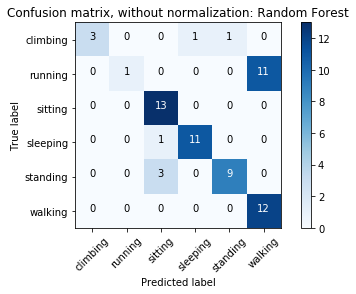

noel
(61, 68)
(505, 68)


C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9344262295081968

Best parameters for  Random Forest  found on development set: {'n_estimators': 20}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.885 (+/-0.250) for {'n_estimators': 10}
0.934 (+/-0.200) for {'n_estimators': 20}
0.885 (+/-0.191) for {'n_estimators': 30}
0.918 (+/-0.194) for {'n_estimators': 40}
0.934 (+/-0.147) for {'n_estimators': 50}
0.885 (+/-0.191) for {'n_estimators': 60}
0.918 (+/-0.194) for {'n_estimators': 70}
0.918 (+/-0.194) for {'n_estimators': 80}
0.885 (+/-0.191) for {'n_estimators': 90}
0.918 (+/

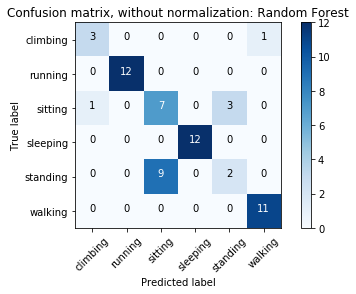

katie
(64, 68)
(502, 68)
Random Forest : 
Best score for  Random Forest : 0.96875

Best parameters for  Random Forest  found on development set: {'n_estimators': 20}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.953 (+/-0.141) for {'n_estimators': 10}
0.969 (+/-0.094) for {'n_estimators': 20}
0.953 (+/-0.099) for {'n_estimators': 30}
0.953 (+/-0.141) for {'n_estimators': 40}
0.938 (+/-0.139) for {'n_estimators': 50}
0.969 (+/-0.094) for {'n_estimators': 60}
0.969 (+/-0.094) for {'n_estimators': 70}
0.969 (+/-0.094) for {'n_estimators': 80}
0.969 (+/-0.094) for {'n_estimators':

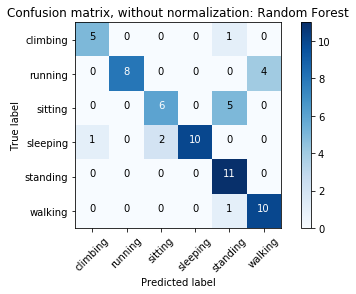

denee
(61, 68)
(505, 68)
Random Forest : 
Best score for  Random Forest : 0.8852459016393442

Best parameters for  Random Forest  found on development set: {'n_estimators': 40}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.836 (+/-0.240) for {'n_estimators': 10}
0.852 (+/-0.132) for {'n_estimators': 20}
0.836 (+/-0.207) for {'n_estimators': 30}
0.885 (+/-0.162) for {'n_estimators': 40}
0.885 (+/-0.162) for {'n_estimators': 50}
0.869 (+/-0.173) for {'n_estimators': 60}
0.885 (+/-0.198) for {'n_estimators': 70}
0.869 (+/-0.173) for {'n_estimators': 80}
0.869 (+/-0.173) for {'n_e

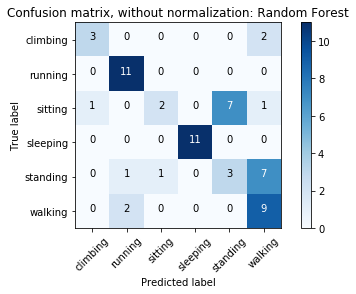

0.753675023254


In [28]:
a = []
print(len(groups))
for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    X_test = test[features]
    y_test = test['activity']
    print(test.shape)
    train = df.loc[(df.subject != g)]
    print(train.shape)
    X_train = train[features]
    y_train = train['activity']
    pram = grid(X_test,y_test,X_train,y_train)
    a.append(run(pram,X_train,y_train,X_test,y_test))
avg = np.array(a)
print(np.mean(avg))    
    
